# MultiClass- Logistic Regression

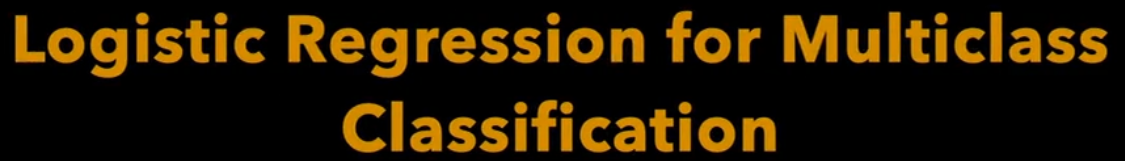

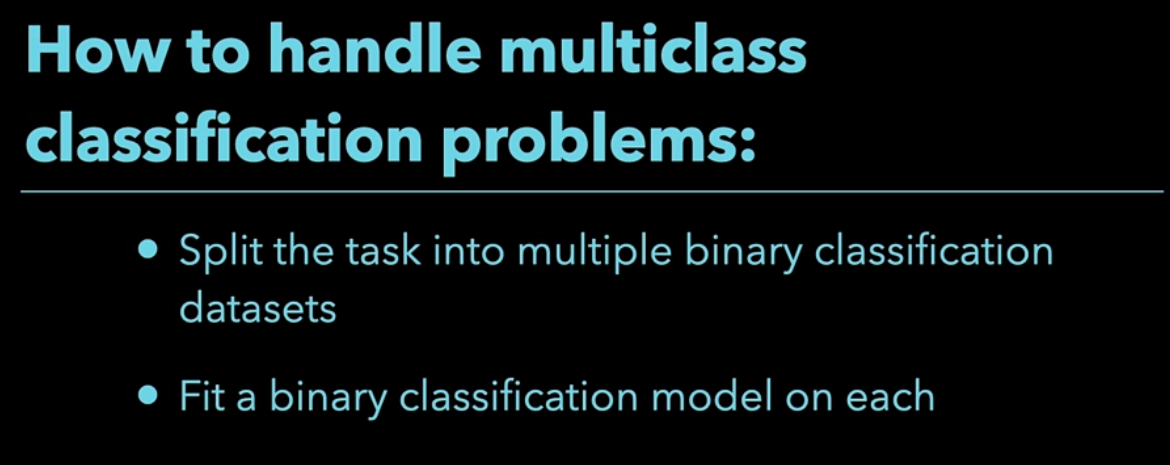

A lot of classification models like logistic regression were originally designed for binary classification, that is predicting whether something is one thing or another. For datasets with more than two classes, what do you do? For multiclass classification problems, one approach is to split the task into multiple binary classification datasets and fit a binary classification model on each. In this lecture, we will explore the One-vs-Rest strategy and how you can apply it to logisitic regression using Scikit-Learn.

## One-vs-Rest

One Versus Rest (OvR), which is also called one versus all (OvA) is a technique that extends binary classifiers to multi-class problems. Here is how it works: 

* You train one classifier per class, where one class is treated as the positive class and the other classes are considered negative classes. 

For example, say you have an image recogition task. Your dataset has 4 classes, the digits 0, 1, 2, and 3. Your goal is to classify them. Using the one versus rest approach, you break down the task into 4 binary classification problems. 

Binary Classification Problem 1: digit 0 vs digits 1, 2, and 3

Binary Classification Problem 2: digit 1 vs digits 0, 2, and 3

Binary Classification Problem 3: digit 2 vs digits 0, 1, and 3

Binary Classification Problem 4: digit 3 vs digits 0, 1, and 2

From there, if you want to classify a new sample, you would use each of the classifiers. The model that predicts the highest class probability is the predicted class. 

## Import Libraries

In [29]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression

## Load the Dataset
 The code below loads a modified version of the digits dataset which is arranged in a csv file for convenience. The data consists of pixel intensity values for 720 images that are 8 by 8 pixels. Each image is labeled with a number from 0-4. 

In [30]:
df = pd.read_csv('modifiedDigits4Classes.csv')

In [112]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,1,9,15,11,0,0,0,0,...,0,0,0,1,10,13,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0,0,6,12,12,6,0,0,0,0,...,0,0,0,2,11,10,4,0,0,1
716,0,3,14,15,6,0,0,0,0,7,...,0,0,4,15,13,12,11,1,0,2
717,0,1,10,13,2,0,0,0,0,10,...,0,0,0,9,13,11,10,9,0,2
718,0,0,15,13,1,0,0,0,0,0,...,0,0,0,10,13,10,6,2,0,2


In [113]:
df.shape

(720, 65)

In [114]:
#df.info()

In [115]:
df.label.value_counts()

3    183
1    182
0    178
2    177
Name: label, dtype: int64

In [116]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', 'label'],
      dtype='object')

## Visualize Each Digit

In [23]:
pixel_colnames = df.columns[:-1]

In [24]:
pixel_colnames

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63'],
      dtype='object')

In [25]:
# Get all columns except the label column for the first image
image_values = df.loc[0, pixel_colnames].values

In [118]:
image_values

array([ 0,  0,  5, 13,  9,  1,  0,  0,  0,  0, 13, 15, 10, 15,  5,  0,  0,
        3, 15,  2,  0, 11,  8,  0,  0,  4, 12,  0,  0,  8,  8,  0,  0,  5,
        8,  0,  0,  9,  8,  0,  0,  4, 11,  0,  1, 12,  7,  0,  0,  2, 14,
        5, 10, 12,  0,  0,  0,  0,  6, 13, 10,  0,  0,  0], dtype=int64)

In [120]:
image_values.reshape(8,8)

array([[ 0,  0,  5, 13,  9,  1,  0,  0],
       [ 0,  0, 13, 15, 10, 15,  5,  0],
       [ 0,  3, 15,  2,  0, 11,  8,  0],
       [ 0,  4, 12,  0,  0,  8,  8,  0],
       [ 0,  5,  8,  0,  0,  9,  8,  0],
       [ 0,  4, 11,  0,  1, 12,  7,  0],
       [ 0,  2, 14,  5, 10, 12,  0,  0],
       [ 0,  0,  6, 13, 10,  0,  0,  0]], dtype=int64)

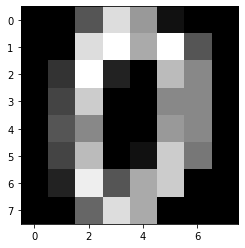

In [121]:
plt.imshow(image_values.reshape(8,8),cmap='gray')

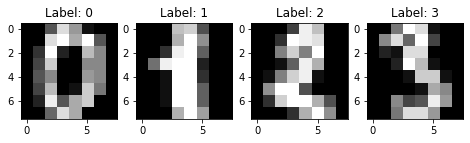

In [9]:
plt.figure(figsize=(10,2))
for index in range(0, 4):

    plt.subplot(1, 5, 1 + index )
    image_values = df.loc[index, pixel_colnames].values
    image_label = df.loc[index, 'label']
    plt.imshow(image_values.reshape(8,8), cmap ='gray')
    plt.title('Label: ' + str(image_label))

## Splitting Data into Training and Test Sets

In [ ]:
from sklearn.model_selection import train_test_split

In [128]:
df.shape

(720, 65)

In [129]:
X_train, X_test, y_train, y_test = train_test_split(df[pixel_colnames], df['label'], random_state=0)#test_size=0.30)

In [130]:
y_train

109    1
700    2
101    2
499    3
319    2
      ..
707    3
192    1
629    2
559    1
684    1
Name: label, Length: 540, dtype: int64

## Standardize the Data
Logistic Regression is effected by scale so you need to scale the features in the data before using Logistic Regresison. You can transform the data onto unit scale (mean = 0 and variance = 1) for better performance. Scikit-Learn's `StandardScaler` helps standardize the dataset’s features. Note you fit on the training set and transform on the training and test set.

In [ ]:
from sklearn.preprocessing import StandardScalar

In [131]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegreassion

In [137]:
# multi_class is specifying one versus rest
clf = LogisticRegression(solver='liblinear',
                         multi_class='ovr', 
                         random_state = 0)

clf.fit(X_train, y_train) # model Training 
print('Training accuracy:', clf.score(X_train, y_train))
print('Test accuracy:', clf.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


Both the training and test accuracies are very high. If you access the intercept terms by using the `intercept_` attribute, you can see that the array has four values. Since the Logistic Regression instance was fit on a multiclass dataset via the OvR approach, the first intercept belongs to the model that fits digit 0 versus digits 1,2, and 3. The second value is the intercept of the model that fits digit 1 versus digits 0,2, and 3. Etc. 

In [138]:
clf.intercept_

array([-2.712674  , -3.54379096, -3.18367757, -2.623974  ])

Similarly, you can get 4 different coefficient matrices. 

In [140]:
clf.coef_.shape

(4, 64)

In [142]:
X_test.shape

(180, 64)

## Predictions

In [146]:
# The second class is the highest score so it will be the prediction for this data
clf.predict_proba(X_test[0:1])

array([[0.00183123, 0.98368966, 0.00536378, 0.00911533]])

In [145]:
pd.DataFrame(X_test[0:1])

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.441642,-0.484355,-0.160167,0.351088,-0.554711,-0.315472,-0.043073,-0.057831,-0.729292,...,-0.953051,-0.251743,-0.043073,-0.366896,-0.123292,0.727985,-0.127027,-1.619526,-0.611468,-0.297254


In [147]:
clf.predict(X_test[0:1])

array([1], dtype=int64)

So that's it, I encourage you to try using logisitic regression for multiclass classification.

In [148]:
score=clf.score(X_test,y_test)

In [149]:
score

1.0

In [100]:
from sklearn import metrics
import seaborn as sns

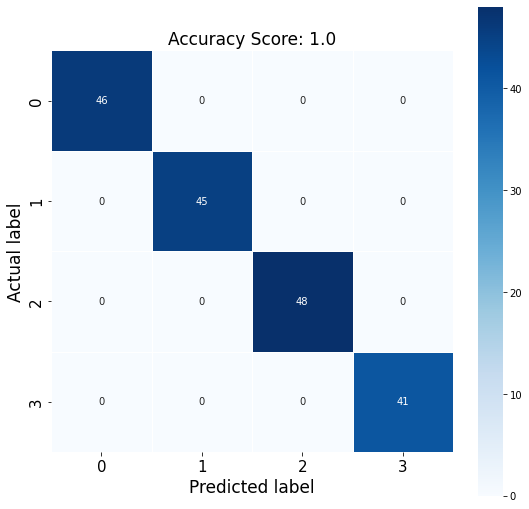

In [151]:
from sklearn import metrics
import seaborn as sns
score=clf.score(X_test,y_test)
cm = metrics.confusion_matrix(y_test, clf.predict(X_test))

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

In [150]:
cm

array([[46,  0,  0,  0],
       [ 0, 45,  0,  0],
       [ 0,  0, 48,  0],
       [ 0,  0,  0, 41]], dtype=int64)

<AxesSubplot:>

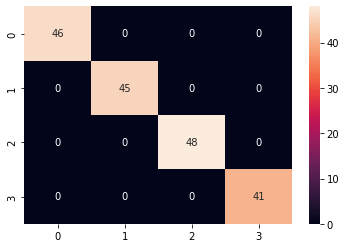

In [107]:
sns.heatmap(cm,annot=True)

In [108]:
from sklearn.metrics import precision_recall_fscore_support

In [152]:
precision_recall_fscore_support(y_test, clf.predict(X_test))

(array([1., 1., 1., 1.]),
 array([1., 1., 1., 1.]),
 array([1., 1., 1., 1.]),
 array([46, 45, 48, 41], dtype=int64))